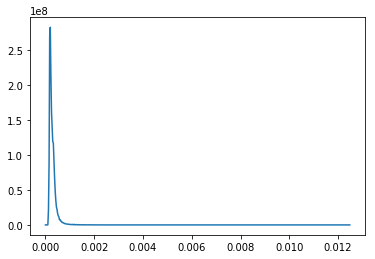

In [6]:
from scipy import constants as sp
import os
import numpy as np
from matplotlib import pyplot as plt
from qsd.data_processing import readcomsol,postproc,setparams

# Read data from downloads
file_dbx = os.getcwd() + '/downloads/exports/Bx_fullData.csv'
file_dby = os.getcwd() + '/downloads/exports/By_fullData.csv'

rdx = readcomsol.ReadComsol(file_dbx)
rdy = readcomsol.ReadComsol(file_dby)

# Read csv file, and get x,y annd dbx/dby data for each
# blocked point in space
bx_x,bx_y,bx_z = rdx.read_full_data()
by_x,by_y,by_z = rdy.read_full_data()

dbx = np.asarray(bx_z).astype(np.float)
dby = np.asarray(by_z).astype(np.float)

# Define geometry of the superconductor
setp = setparams.SetParams()
params = setp.set_params("cpw_parameters.txt")

w = params["w"]
t = params["t"]
l = params["l"]
pen = params["pen"]
omega = params["omega"]
Z = params["Z"]

# Postprocess data
post = postproc.PostProc(w,t,l,pen,omega,Z)

# Single spin coupling for each point on mesh grid
g = post.coupling(dbx,dby,theta=0)

# Calculate Purcell enhancement at each grid point
Q = 10000 # Q factor - for now typed in, but will be found from CST calcs ultimately
purcell = post.purcell_rate(g,Q)
pdens, pedge = post.purcell_density(bx_x,bx_y,purcell) # density

# Weight by contribution to signal
g_weight = np.zeros(len(pedge))
for i in range (0,len(pedge)-1):
    g_weight[i] = sum(g[np.where(np.logical_and(purcell>=pedge[i], purcell<=pedge[i+1]))])

rho_weighted = pdens * g_weight**2

plt.plot(pedge,rho_weighted)
plt.show()